# Algorithm run animation creator


In [1]:
# If pydistsim is not installed and the script is run from docs/notebooks directory
# import sys
# sys.path.append("../../")

# for interactive plots
%matplotlib notebook

from pydistsim.network import NetworkGenerator
from pydistsim.demo_algorithms.santoro2007.yoyo import YoYo
from pydistsim.simulation import Simulation
from pydistsim.network.behavior import ExampleProperties
from pydistsim.gui import drawing as draw

### As always, let's start with network and simulation object creation


In [2]:
net = NetworkGenerator.generate_hypercube_network(8)

# Let's add some random delays to the communication, so we can see it in action
net.behavioral_properties = ExampleProperties.RandomDelayCommunication


sim = Simulation(net, (YoYo,))

### Create a frame with the simulation's current state

In the following cell, we show how to create a figure with the current state of the simulation.
This will show each node's state and the messages that are currently in transit, lost, delivered,
or pending to be sent.


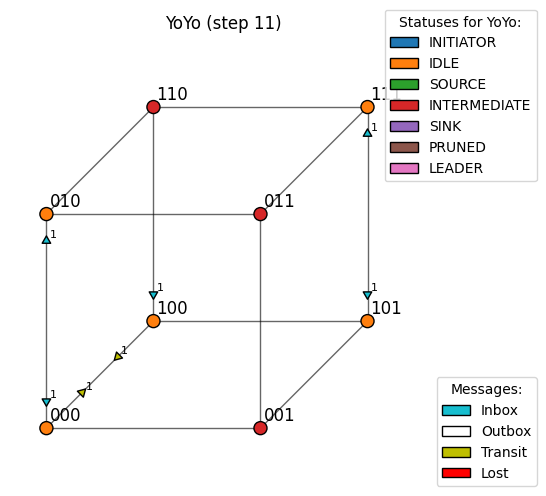

In [3]:
sim.run(10)
fig = draw.draw_current_state(sim)

fig

### Keep going and watch the simulation as it runs

We can run the simulation and update the figure at each step to see how the algorithm works.


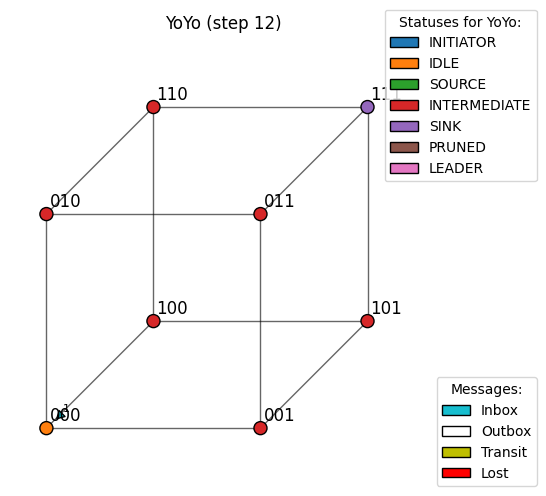

In [4]:
sim.run(1)
fig = draw.draw_current_state(sim)

fig

## Video creation

The simplest way to understand how the algorithm works is to watch it in action. We can create something like a stop-motion
video of the simulation to see how the algorithm evolves over time.

In the following cell, we show how to create a video with the whole simulation process. You should be able to watch
the video from the notebook.


In [5]:
from IPython.display import HTML

sim.reset()
anim = draw.create_animation(sim)
video = anim.to_html5_video()

HTML(video)  # Careful! This must be the last line of the cell, otherwise the video will not be displayed.

To save the video, you can use the `save` method of the `Animation` class.

This will raise an exception if FFMpeg is not installed.

Learn more about animation writers at:

https://matplotlib.org/stable/api/animation_api.html#writer-classes


In [6]:
from matplotlib.animation import FFMpegFileWriter

writer = FFMpegFileWriter()
sim.reset()
anim = draw.create_animation(sim)

anim.save("yoyo.mp4", writer=writer)